In [2]:
import os
import sys
from itertools import product
import datetime

import pandas as pd
import numpy as np
import json

%matplotlib inline
from matplotlib import patheffects
import matplotlib.pyplot as plt

In [3]:
# Find the folder wit the csv extract
folder="../../data/"

In [4]:
df_30m_nationalconsumption=pd.read_csv(folder+"30m_national_consumption.csv.gz")
df_30m_nationalconsumption["tstp"]=pd.to_datetime(df_30m_nationalconsumption["tstp"])
df_30m_nationalconsumption.head()

,tstp,consumption,quality
0,2008-07-06 10:00:00,44486,Definitive
1,2008-07-06 11:00:00,46270,Definitive
2,2008-07-06 11:30:00,44801,Definitive
3,2008-07-06 13:00:00,41919,Definitive
4,2008-07-06 14:30:00,40135,Definitive


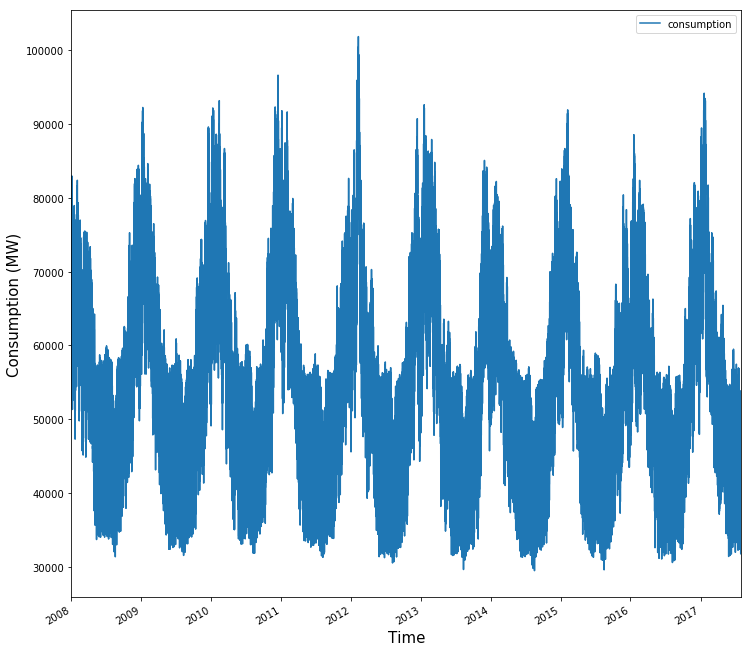

In [4]:
# Plot time raw data
fig, ax = plt.subplots(figsize=(12,12))
df_30m_nationalconsumption.plot(ax=ax,x="tstp",y="consumption")
ax.set_xlabel("Time",fontsize=15)
ax.set_ylabel("Consumption (MW)",fontsize=15)
plt.show()

ax.figure.savefig("../../reports/pictures/rawdata_national_consumption.png")

In [7]:
df_30m_nationalconsumption_def=df_30m_nationalconsumption[df_30m_nationalconsumption["quality"]=="Definitive"]
df_30m_nationalconsumption_def["day"]=df_30m_nationalconsumption_def.apply(lambda row: row["tstp"].strftime("%Y-%m-%d"),axis=1)


C:\Users\daign\Anaconda3\envs\data_analytics\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
len(df_30m_nationalconsumption_def)

140254

In [9]:
df_daily_energy_consumption_def=df_30m_nationalconsumption_def.groupby(["day"]).sum()
len(df_daily_energy_consumption_def)

2922

In [34]:
#Focus on the daily energy
df_30m_nationalconsumption["energy"]=df_30m_nationalconsumption.apply(lambda row: row["consumption"]*30*60/3600,axis=1)
df_30m_nationalconsumption["day"]=df_30m_nationalconsumption.apply(lambda row: row["tstp"].strftime("%Y-%m-%d"),axis=1)
df_30m_nationalconsumption["month"]=df_30m_nationalconsumption.apply(lambda row: int(row["tstp"].strftime("%m")),axis=1)
df_30m_nationalconsumption["year"]=df_30m_nationalconsumption.apply(lambda row: int(row["tstp"].strftime("%Y")),axis=1)
df_30m_nationalconsumption["weekday"]=df_30m_nationalconsumption.apply(lambda row: row["tstp"].weekday(),axis=1)
df_30m_nationalconsumption["hour"]=df_30m_nationalconsumption.apply(lambda row: int(row["tstp"].strftime("%H")),axis=1)

df_30m_nationalconsumption.head()

,tstp,consumption,quality,energy,day,hour,year,weekday,month
0,2008-07-06 10:00:00,44486,Definitive,22243.0,2008-07-06,10,2008,6,7
1,2008-07-06 11:00:00,46270,Definitive,23135.0,2008-07-06,11,2008,6,7
2,2008-07-06 11:30:00,44801,Definitive,22400.5,2008-07-06,11,2008,6,7
3,2008-07-06 13:00:00,41919,Definitive,20959.5,2008-07-06,13,2008,6,7
4,2008-07-06 14:30:00,40135,Definitive,20067.5,2008-07-06,14,2008,6,7


In [35]:
# Create daily analysis
df_daily_energy_consumption=df_30m_nationalconsumption.groupby(["day"]).sum()["energy"]
df_daily_energy_consumption.head()

day
2008-01-01    1465179.0
2008-01-02    1737852.0
2008-01-03    1792039.0
2008-01-04    1713511.5
2008-01-05    1526082.0
Name: energy, dtype: float64

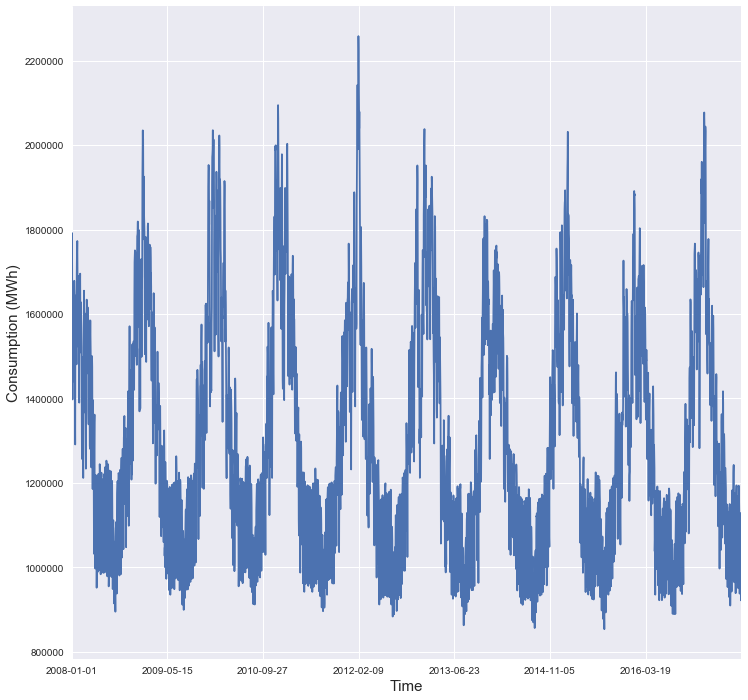

In [36]:
# Plot the daily energy consumption
fig, ax = plt.subplots(figsize=(12,12))
df_daily_energy_consumption.plot(ax=ax,y="energy",legend=None)
ax.set_xlabel("Time",fontsize=15)
ax.set_ylabel("Consumption (MWh)",fontsize=15)
plt.show()

ax.figure.savefig("../../reports/pictures/daily_national_consumption.png")

In [37]:
heatmap_=pd.pivot_table(df_30m_nationalconsumption, values="energy", index=['month'],columns=['hour'], aggfunc=np.mean)

In [57]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_heatmap(fig, ax,df,title):
   
    m, n = len(df.index),len(df.columns)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel(title, fontsize=15)
    #ax.set_ylabel('Candidates' , fontsize=15)
    #ax.set_title('Who with who', fontsize=15, fontweight='bold')
    ax = plt.imshow(df, interpolation='nearest', cmap='seismic').axes

    _ = ax.set_xticks(np.linspace(0, n-1, n))
    _ = ax.set_xticklabels(df.columns,rotation=45)
    _ = ax.set_yticks(np.linspace(0, m-1, m))
    _ = ax.set_yticklabels(df.index)


    ax.grid('off')
    ax.xaxis.tick_top()
    path_effects = [patheffects.withSimplePatchShadow(shadow_rgbFace=(1,1,1))]

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(cax=cax)
#     for i, j in product(range(m), range(n)):
#         _ = ax.text(j, i, '{0:.2f}'.format(df.iloc[i, j]),
#             size='medium', ha='center', va='center',path_effects=path_effects)
    
    return fig,ax

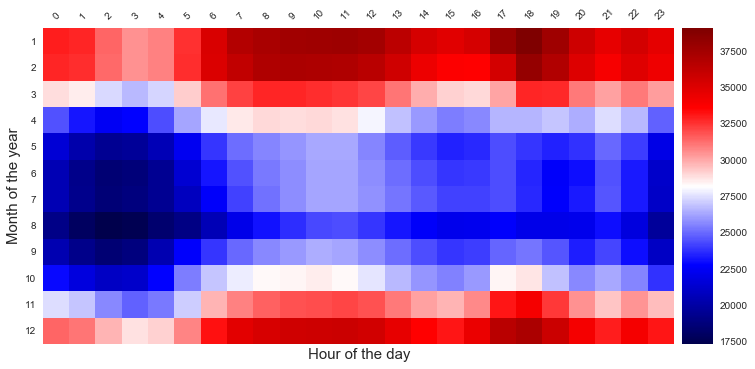

In [59]:
fig, ax = plt.subplots(figsize=(12,12))
fig,ax=plot_heatmap(fig, ax,heatmap_,"test")
ax.set_xlabel("Hour of the day",fontsize=15)
ax.set_ylabel("Month of the year",fontsize=15)
plt.show()

ax.figure.savefig("../../reports/pictures/heatmap_daily_national_consumption.png")

In [80]:
# In the case i need to colelct the local db

# file="D:\Developpement\Perso\Data\weatherunderground_airportfrance\database.sqlite"
# conn = sqlite3.connect(file)

In [123]:
# Use of the weather data from clermont ferrand
df_weather=pd.read_csv("../../data/weather_data.csv.gz")

df_weather["tstp"]=pd.to_datetime(df_weather["tstp"])
df_weather["day"]=df_weather.apply(lambda row: row["tstp"].strftime("%Y-%m-%d"),axis=1)
df_weather["hour"]=df_weather.apply(lambda row: int(row["tstp"].strftime("%H")),axis=1)
df_weather["month"]=df_weather.apply(lambda row: int(row["tstp"].strftime("%m")),axis=1)
df_weather["year"]=df_weather.apply(lambda row: int(row["tstp"].strftime("%y")),axis=1)
df_weather["weekday"]=df_weather.apply(lambda row: row["tstp"].weekday(),axis=1)
df_weather.head()

,tstp,outdoor_temperature,outdoor_humidity,precipitation,gust_speed,wind_speed,wind_direction,station_name,day,hour,month,year,weekday
0,2006-01-01 00:00:00,6.0,54.0,NaN,NaN,22.2,240.0,LFLC,2006-01-01,0,1,6,6
1,2006-01-01 03:00:00,5.0,81.0,NaN,-,3.7,0.0,LFLC,2006-01-01,3,1,6,6
2,2006-01-01 05:00:00,5.0,70.0,NaN,-,13.0,160.0,LFLC,2006-01-01,5,1,6,6
3,2006-01-01 06:00:00,4.0,63.0,NaN,NaN,7.4,140.0,LFLC,2006-01-01,6,1,6,6
4,2006-01-01 07:00:00,3.0,75.0,NaN,-,11.1,220.0,LFLC,2006-01-01,7,1,6,6


In [66]:
df_weather.columns

Index(['tstp', 'outdoor_temperature', 'outdoor_humidity', 'precipitation',
       'gust_speed', 'wind_speed', 'wind_direction', 'station_name', 'day',
       'hour', 'month', 'year', 'weekday'],
      dtype='object')

In [69]:
df_weather_clean=df_weather[df_weather["outdoor_temperature"]>-100]
df_weather_day=df_weather_clean.groupby("day").mean()[["outdoor_temperature","outdoor_humidity"]]
df_weather_day.head()

,outdoor_temperature,outdoor_humidity
day,,
2006-01-01,5.578947,72.631579
2006-01-02,3.863636,81.500000
2006-01-03,3.125000,79.333333
2006-01-04,0.434783,85.478261
2006-01-05,-1.333333,90.740741


In [63]:
df_ptg=df_weather_day.join(df_daily_energy_consumption,how='inner')[["outdoor_temperature","outdoor_humidity","energy"]]
df_ptg.head()

,outdoor_temperature,outdoor_humidity,energy
day,,,
2008-01-01,0.407407,89.111111,1465179.0
2008-01-02,-1.967742,90.483871,1737852.0
2008-01-03,6.892857,71.928571,1792039.0
2008-01-04,7.814815,75.407407,1713511.5
2008-01-05,9.677419,72.290323,1526082.0


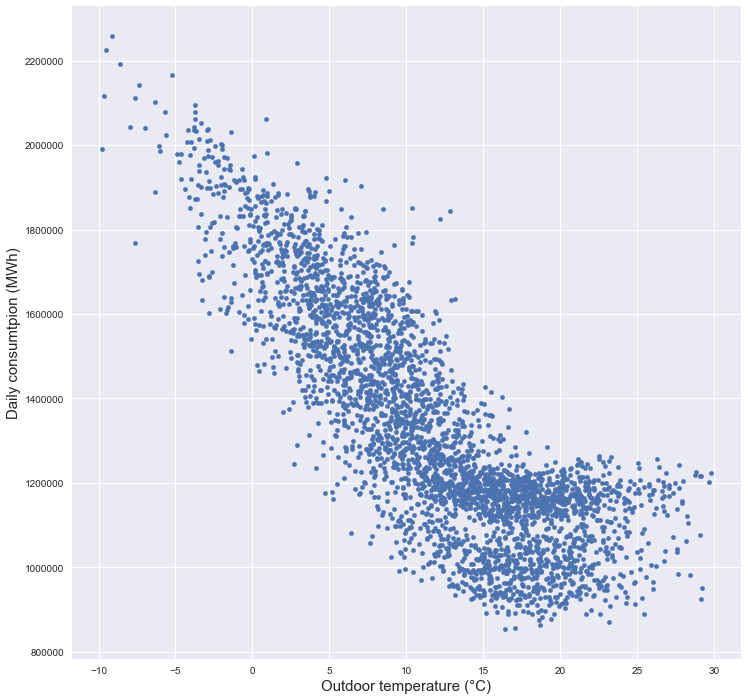

In [124]:
fig, ax = plt.subplots(figsize=(12,12))
df_ptg.plot(ax=ax,x="outdoor_temperature",y="energy",kind="scatter")
ax.set_xlabel("Outdoor temperature (°C)", fontsize=15)
ax.set_ylabel("Daily consumtpion (MWh)", fontsize=15)
plt.show()

ax.figure.savefig("../../reports/pictures/ptg_daily_national_consumption.png")

In [122]:
df_cities=pd.read_csv("../../data/ign_data.csv.gz")

df_cities["population/squaremeter"]=df_cities.apply(lambda row : row["population"]/row["area"],axis=1)
df_cities_clean=df_cities[["name","type","latitude","longitude","population/squaremeter"]]
df_cities_clean.head()

,name,type,latitude,longitude,population/squaremeter
0,LOURTIES-MONBRUN,COMMUNE SIMPLE,43.459799,0.535802,14.389234
1,BOUDY-DE-BEAUREGARD,COMMUNE SIMPLE,44.548109,0.677957,40.628067
2,ARMOUS-ET-CAU,COMMUNE SIMPLE,43.573144,0.190291,10.193133
3,AUTRANS-MEAUDRE EN VERCORS,COMMUNE SIMPLE,45.135052,5.527164,88.193414
4,WILLEMAN,COMMUNE SIMPLE,50.363923,2.159486,17.399804
